<a href="https://colab.research.google.com/github/Vdntrai/Medical_Insurance_Cost_Estimator/blob/main/Medical_Insurance_Cost_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Importing Relevant Depedencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
df= pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

####Data Analysis

<Figure size 1000x1000 with 0 Axes>

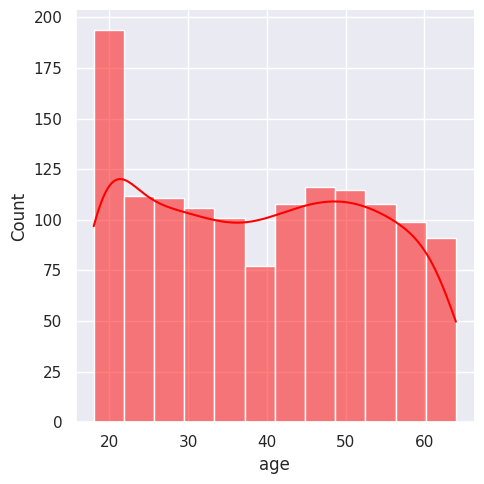

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['age'],color='red',alpha=0.5,kde=True)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

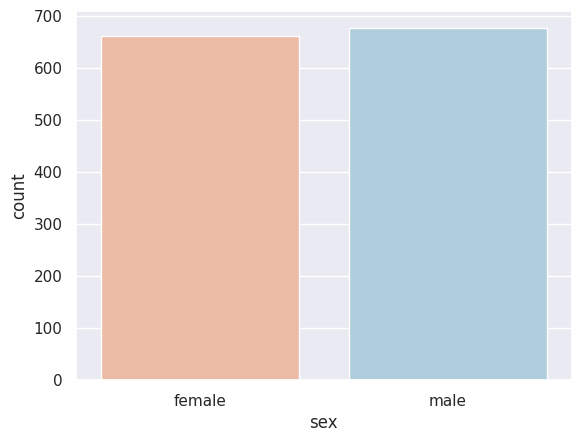

In [ ]:
sns.countplot(x='sex', data=df, hue='sex', palette='RdBu', legend=False)

<Figure size 1000x1000 with 0 Axes>

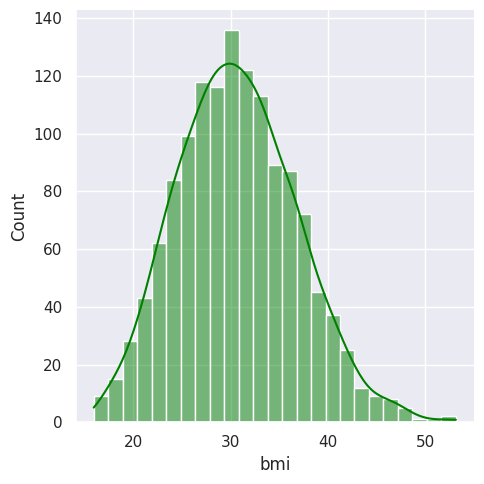

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['bmi'],color='green',alpha=0.5,kde=True)
plt.show()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

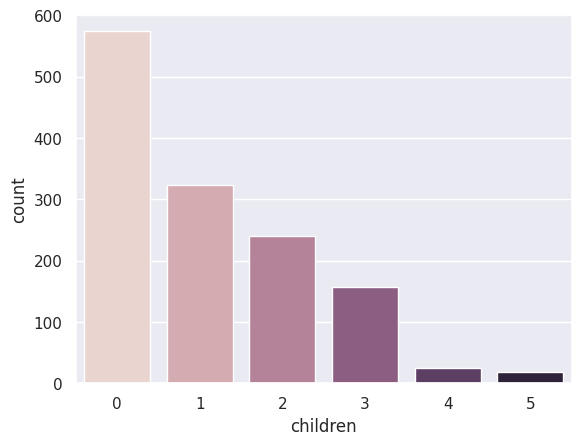

In [ ]:
sns.countplot(x='children', data=df, hue='children', legend=False)
df['children'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

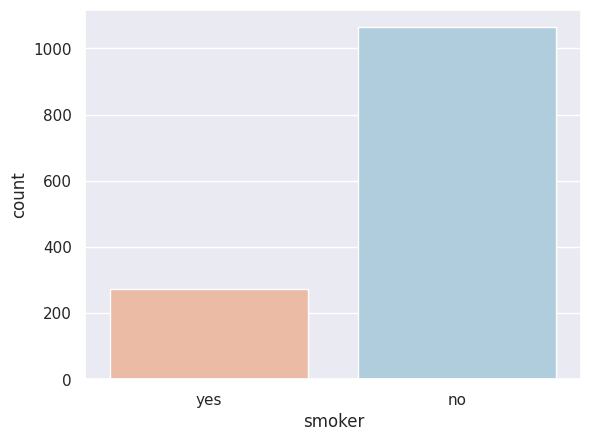

In [ ]:
sns.countplot(x='smoker', data=df, hue='smoker', palette='RdBu',legend=False)
df['smoker'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

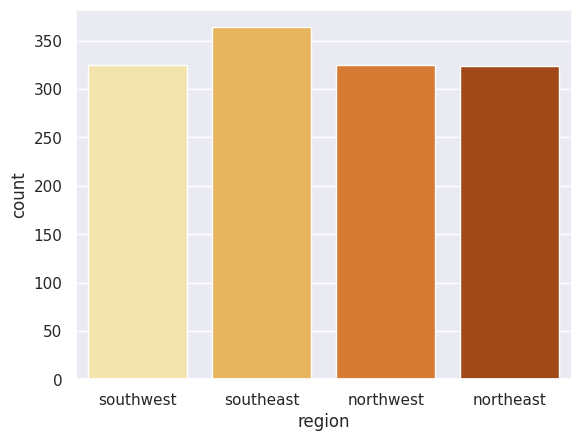

In [ ]:
sns.countplot(x='region', data=df, hue='region', palette='YlOrBr',legend=False)
df['region'].value_counts()

<Figure size 1000x1000 with 0 Axes>

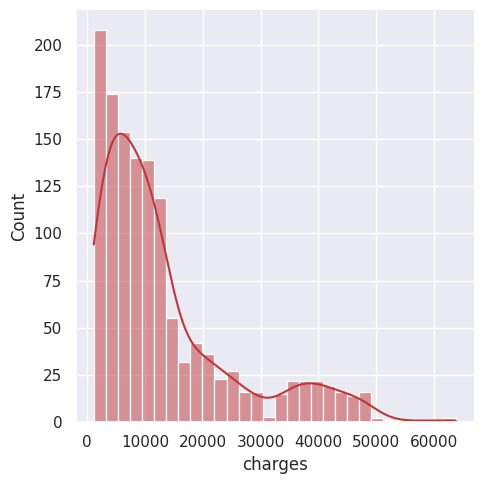

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(df['charges'],kde=True)
plt.show()

Preprocessing

In [ ]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

Splitting Features and Targets


In [ ]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']

In [ ]:
#Splitting Data to Training and Testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
train_pred=model.predict(X_train)
train_acc=metrics.r2_score(Y_train,train_pred)
print(f'R² Score of Training Data:{train_acc*100:.2f}%')

R² Score of Training Data:75.15%


In [ ]:
test_pred=model.predict(X_test)
test_acc=metrics.r2_score(Y_test,test_pred)
print(f'R² Score of Testing Data:{test_acc*100:.2f}%')

R² Score of Testing Data:74.47%


### Prediction Model

In [ ]:
data=(31,1,25.74,0,1,0)
asnparr=np.asarray(data)
reshaped=asnparr.reshape(1,-1)
columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
df_input = pd.DataFrame(reshaped, columns=columns)
prediction=model.predict(df_input)
print(f'The Medical insurance Cost estimate is: ${prediction[0]:.2f}')

The Medical insurance Cost estimate is: $3760.08
